In [1]:
import numpy as np
from parafoil import CamberThicknessAirfoil, CircularPassage

airfoil = CamberThicknessAirfoil(
    inlet_angle=40.0,
    outlet_angle=-20.0,
    stagger_angle=np.radians(0.0),
    upper_thick_prop=[0.035, 0.14, 0.14, 0.035, 0.007],
    lower_thick_prop=[0.035, 0.14, 0.14, 0.035, 0.007],
    leading_prop=0.5,
    trailing_prop=0.5,
    chord_length=1,
    angle_units="deg"
)

# 100x chord length radius traditionally for airfoil external flow problem
passage = CircularPassage(
    airfoil=airfoil,
    radius=40.0,
)

passage.visualize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 17 (Line)
Info    : [ 20%] Meshing curve 18 (Line)
Info    : [ 20%] Meshing curve 19 (Line)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 20%] Meshing curve 22 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
I

Inner_Iter      "Time(sec)"         "rms[Rho]"          "rms[RhoU]"     \
0            0            0.356866           -0.688932            1.746898   
1            1            0.357180           -1.146338            1.521108   
2            2            0.356571           -1.270153            1.476147   
3            3            0.353314           -1.338779            1.429934   
4            4            0.350619           -1.391749            1.389771   
5            5            0.349526           -1.449452            1.351394   
6            6            0.348497           -1.529791            1.313969   
7            7            0.348493           -1.597750            1.276613   
8            8            0.347840           -1.644485            1.239461   
9            9            0.347204           -1.695749            1.202873   
10          10            0.346911           -1.745366            1.166568   
11          11            0.347137           -1.783988            1.130033   
12          12            0.347693           -1.805777            1.093499   
13          13            0.348047           -1.808657            1.056000   
14          14            0.347834           -1.809762            1.017222   
15          15            0.347801           -1.827684            0.977407   
16          16            0.347624           -1.861760            0.939168   
17          17            0.347643           -1.903287            0.903357   
18          18            0.348264           -1.943150            0.869713   
19          19            0.348567           -1.980514            0.838874   
20          20            0.348919           -2.019717            0.810741   
21          21            0.350205           -2.063702            0.784238   
22          22            0.350633           -2.106834            0.758639   
23          23            0.350427           -2.145162            0.734082   
24          24            0.350249           -2.178585            0.710415   
25          25            0.349984           -2.209213            0.687149   
26          26            0.349808           -2.238117            0.664331   
27          27            0.349607           -2.266016            0.641827   
28          28            0.349678           -2.294154            0.619509   
29          29            0.349721           -2.327873            0.596010   
30          30            0.349683           -2.360996            0.571932   
31          31            0.349736           -2.388409            0.547043   
32          32            0.349894           -2.408264            0.521218   
33          33            0.350146           -2.423575            0.494140   
34          34            0.350071           -2.437887            0.465691   
35          35            0.350148           -2.452253            0.435982   
36          36            0.350120           -2.468314            0.405099   
37          37            0.349987           -2.489309            0.372793   
38          38            0.349836           -2.514040            0.338815   
39          39            0.349742           -2.541357            0.303424   
40          40            0.349924           -2.569716            0.266722   
41          41            0.349801           -2.599048            0.228955   
42          42            0.349737           -2.632846            0.190561   
43          43            0.349671           -2.674558            0.151809   
44          44            0.349553           -2.726651            0.112590   
45          45            0.349528           -2.786755            0.072896   
46          46            0.349579           -2.847752            0.033523   
47          47            0.349491           -2.905313           -0.004438   
48          48            0.349397           -2.958872           -0.040110   
49          49            0.349306           -3.009423           -0.073510   

        "rms[RhoV]"      

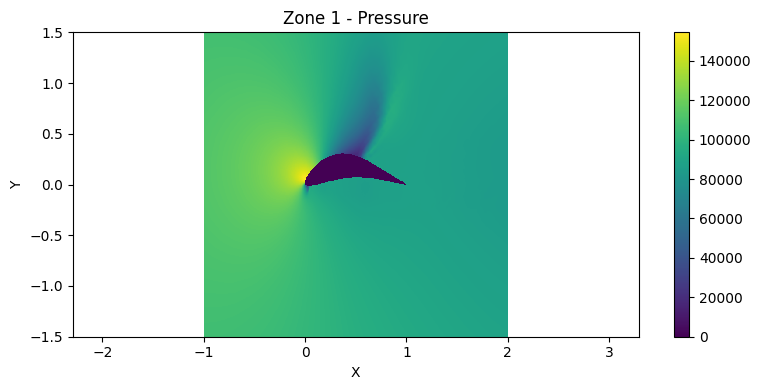

In [2]:
from paraflow import get_flasher, run_simulation, SimulationParams, get_frames, display_frame, SimulationResult
from paraflow.simulation.su2 import Su2SimulationConfig
import numpy as np

flasher = get_flasher("air", "gas")
inlet_total_state = flasher.flash(P=101325.0, T=273.15, mach_number=0.8)


use_cache = False
if not use_cache:
    sim_results = run_simulation(
        passage,
        params=SimulationParams(
            inlet_total_state=inlet_total_state, 
        ),
        working_directory="./simulation_out", 
        id="1",
        auto_delete=False,
        # cfg=Su2SimulationConfig(
        #     custom_executable_path="~/simulators/su2/SU2-7.5.2-macos64"
        # )
    )
    sim_results.to_file("sim_results.pkl")
else:
   sim_results = SimulationResult.from_file("sim_results.pkl")

frames = get_frames(
    sim_results, 
    property_names=["Pressure"], 
    num_pnts=1000, 
    size=3,
    offset=np.array([0.5,0])
)
display(sim_results.eval_values)
display_frame(frames, "Pressure")
